# Week 2

## Data manipulation and visualization with python

### What are the keystones of Data Analysis

* Formulating Questions

* Data wrangling: gather, access, clean, tranform

* Exploratory data analysis

* Making conclusions and predictions: modeling, machine learning

* Reporting and communication

### Working with data in Python

Data types and data structures - 
containers to hold, access and modify data efficiently.

Our options:
- Python built-in data types
- Python built-in data structures and functions
- Python packages extend the built-in capabilities (packages in standard library and pip)
- 3rd party (non-pythonic) tools that we can run from Python

### Built-in data types, structures and functions

* int, float, complex, bool
* dict, list, set and frozenset, tuple, str, bytes
* https://docs.python.org/3/library/stdtypes.html
* https://docs.python.org/3/library/datatypes.html


### List

In [113]:
a = [1,2,3,4,5]
print(a[0])
print(a[-1])

1
5


In [114]:
print(a[:])

[1, 2, 3, 4, 5]


In [115]:
print(a[:3], a[3:])

[1, 2, 3] [4, 5]


means "give me the first 3" and "skip the first 3"
>[start: stop]
>>[inclusive: exclusive]
>>>[skip: get] = get - skip
>>>>[:get]
>>>>>[skip:] all but the first n_skipped

In [116]:
print(a[0:3], a[3:5])

[1, 2, 3] [4, 5]


In [117]:
print(a[slice(0, 3)])
print(type(slice(0, 3)))

[1, 2, 3]
<class 'slice'>


In [118]:
print(a[::2])

[1, 3, 5]


[start:stop:step]

In [119]:
del a[::2]
print(a)

[2, 4]


a now has 1, 3, and 5 removed

In [120]:
from math import sin
for x in range(4):
    print(sin(x))

0.0
0.8414709848078965
0.9092974268256817
0.1411200080598672


In [121]:
from math import sin
print([sin(x) for x in range(4)])

[0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672]


^list comprehension
>very similar to for loops

lamba is a quick way to define a function

In [122]:
print(sin(3))

0.1411200080598672


In [123]:
list(map(sin, range(4)))

[0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672]

In [124]:
a.append(6)
a

[2, 4, 6]

In [125]:
a.extend(a)
a

[2, 4, 6, 2, 4, 6]

above functions only make sense in context of a list

### Arrays in Python

* list
* array 1-dimensional https://docs.python.org/3/library/array.html
* numpy supports multidimensional arrays

In [126]:
from array import array
from statistics import mean

al = array('l', [1, 2, 3, 4, 5])
print(al)
print(sum(al), mean(al))

array('l', [1, 2, 3, 4, 5])
15 3


In [127]:
ad = array('d', [1.0, 2.0, 3.14])
print(ad)
print(sum(ad), mean(ad))

array('d', [1.0, 2.0, 3.14])
6.140000000000001 2.046666666666667


In [128]:
# However:
print(2 * ad)

print(ad + ad)

array('d', [1.0, 2.0, 3.14, 1.0, 2.0, 3.14])
array('d', [1.0, 2.0, 3.14, 1.0, 2.0, 3.14])


### Other numeric issues

In [129]:
0.1 + 0.1 + 0.1 == 0.3

False

In [130]:
from decimal import Decimal

Decimal('0.1') + Decimal('0.1') + Decimal('0.1') == Decimal('0.3')

True

In [131]:
from sklearn.datasets import load_iris

In [132]:
i = load_iris()

In [133]:
type(i.data)

numpy.ndarray

In [134]:
import numpy as np

np.isclose(0.1 + 0.1 + 0.1, 0.3)

True

### Overview of packages

* __numpy__  - N-dimensional arrays and algebra
* __scipy__ - scientific computing (uses numpy)
* __pandas__  - data structures & analysis (uses numpy)
* __matplotlib__, __seaborn__ - plotting
* __jupyter__ - notebook, integration with pandas and plotting
* __scikit-learn (sklearn)__  - Machine learning algorithms (uses numpy and scipy)
* statistics - standard package - basic descriptive statistics
* statsmodels - statistical modeling, hypothesis testing

Make sure you know where to find documentation for these packages

### Datasets:

* https://catalog.data.gov/dataset
* http://mlr.cs.umass.edu/ml/datasets.html
* https://www.kaggle.com/datasets
* https://opendata.socrata.com


__Tabular data__: database tables, Excel, CSV


### Accessing data

* Example datasets "red wine quality"
* Download CSV from https://archive.ics.uci.edu/ml/datasets/wine+quality

In [135]:
winequality_file = "winequality-red.csv"

In [136]:
from itertools import islice

with open(winequality_file) as f:
    for line in islice(f, 0, 5):
        print(line.split(","))

# exclude header and line endings, convert to float

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality\n']
['7.4', '0.7', '0.0', '1.9', '0.076', '11.0', '34.0', '0.9978', '3.51', '0.56', '9.4', '5\n']
['7.8', '0.88', '0.0', '2.6', '0.098', '25.0', '67.0', '0.9968', '3.2', '0.68', '9.8', '5\n']
['7.8', '0.76', '0.04', '2.3', '0.092', '15.0', '54.0', '0.997', '3.26', '0.65', '9.8', '5\n']
['11.2', '0.28', '0.56', '1.9', '0.075', '17.0', '60.0', '0.998', '3.16', '0.58', '9.8', '6\n']


In [137]:
# Python CSVReader
import csv

with open(winequality_file) as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in islice(reader, 0, 5):
        print(', '.join(row))

fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality
7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 5
7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8, 5
7.8, 0.76, 0.04, 2.3, 0.092, 15.0, 54.0, 0.997, 3.26, 0.65, 9.8, 5
11.2, 0.28, 0.56, 1.9, 0.075, 17.0, 60.0, 0.998, 3.16, 0.58, 9.8, 6


In [138]:
# Python CSVReader
import csv

with open(winequality_file) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in islice(reader, 0, 3):
        print(', '.join(row.values()))
        
print(row.keys())
print(row['pH'])
# limitations - data structure is not suitable for data analysis

7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 5
7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8, 5
7.8, 0.76, 0.04, 2.3, 0.092, 15.0, 54.0, 0.997, 3.26, 0.65, 9.8, 5
odict_keys(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
3.26


In [139]:
# Numpy: read CSV
from numpy import genfromtxt
wine_np = genfromtxt(winequality_file, delimiter=',', skip_header=1)
print(wine_np)
print(wine_np.shape)

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]
(1599, 12)


In [140]:
# Pandas: read CSV
from pandas import read_csv
wine_df = read_csv(winequality_file,header=0)
print(wine_df.shape)

(1599, 12)


In [141]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


*This is the method to use*

In [142]:
# numpy array operations:

In [143]:
print(wine_np[0,0])  # first element

7.4


In [144]:
print(wine_np[0,...]) # row

[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
  0.56    9.4     5.    ]


In [145]:
print(wine_np[...,0]) # column

[7.4 7.8 7.8 ... 6.3 5.9 6. ]


In [146]:
pH = wine_np[...,8]
print(pH.min(), pH.mean(), pH.max())

2.74 3.3111131957473416 4.01


In [147]:
# filtering
print(wine_np[pH < 3.2, ...])
print(wine_np[pH < 3.2, ...].shape)

[[11.2   0.28  0.56 ...  0.58  9.8   6.  ]
 [ 8.9   0.62  0.18 ...  0.88  9.2   5.  ]
 [ 8.9   0.62  0.19 ...  0.93  9.2   5.  ]
 ...
 [ 7.8   0.82  0.29 ...  0.53  9.4   5.  ]
 [ 8.4   0.37  0.43 ...  0.81 11.2   7.  ]
 [11.2   0.4   0.5  ...  0.58 10.4   5.  ]]
(349, 12)


In [148]:
import numpy as np

empty_array = np.zeros((3,4,2))
empty_array

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

In [149]:
np.random.rand(3,4,2)

array([[[0.4821914 , 0.87247454],
        [0.21233268, 0.04070962],
        [0.39719446, 0.2331322 ],
        [0.84174072, 0.20708234]],

       [[0.74246953, 0.39215413],
        [0.18225652, 0.74353941],
        [0.06958208, 0.8853372 ],
        [0.9526444 , 0.93114343]],

       [[0.41543095, 0.02898166],
        [0.98202748, 0.33963768],
        [0.70668719, 0.36187707],
        [0.0351059 , 0.85505825]]])

In [150]:
# This will ensure the random samples below can be reproduced. 
# This means the random samples will always be identical.

np.random.seed?

# learn how to invoke docstring help

Docstring:
seed(self, seed=None)

Reseed a legacy MT19937 BitGenerator

Notes
-----
This is a convenience, legacy function.

The best practice is to **not** reseed a BitGenerator, rather to
recreate a new one. This method is here for legacy reasons.
This example demonstrates best practice.

>>> from numpy.random import MT19937
>>> from numpy.random import RandomState, SeedSequence
>>> rs = RandomState(MT19937(SeedSequence(123456789)))
# Later, you want to restart the stream
>>> rs = RandomState(MT19937(SeedSequence(987654321)))
Type:      builtin_function_or_method


In [151]:
help(np.random.seed)

Help on built-in function seed:

seed(...) method of numpy.random.mtrand.RandomState instance
    seed(self, seed=None)
    
    Reseed a legacy MT19937 BitGenerator
    
    Notes
    -----
    This is a convenience, legacy function.
    
    The best practice is to **not** reseed a BitGenerator, rather to
    recreate a new one. This method is here for legacy reasons.
    This example demonstrates best practice.
    
    >>> from numpy.random import MT19937
    >>> from numpy.random import RandomState, SeedSequence
    >>> rs = RandomState(MT19937(SeedSequence(123456789)))
    # Later, you want to restart the stream
    >>> rs = RandomState(MT19937(SeedSequence(987654321)))



In [152]:
np.random.seed(0)
print(np.random.rand(3))

np.random.seed(0)
print(np.random.rand(3))

np.random.seed(1000)
print(np.random.rand(3))

[0.5488135  0.71518937 0.60276338]
[0.5488135  0.71518937 0.60276338]
[0.65358959 0.11500694 0.95028286]


changing the value of the seed generates different sets of random numbers
>can set the seed once at the top, will carry all the way through unless you want to compare (must resent seed in each code block)

In [153]:
wine_np[:3, 8]  # pH values for 3 first wines in the array

array([3.51, 3.2 , 3.26])

In [154]:
# changing values
wine_np[0:3, 8] = [3., 3., 3.]
wine_np[0:3, 8]

array([3., 3., 3.])

In [155]:
wine_np.dtype.name

# change it with wine_np.astype(int)

'float64'

In [156]:
wine_np.astype(int).dtype.name

'int64'

In [157]:
print(pH)
print(2*pH)
print(pH + pH)
print(np.exp(pH))

[3.   3.   3.   ... 3.42 3.57 3.39]
[6.   6.   6.   ... 6.84 7.14 6.78]
[6.   6.   6.   ... 6.84 7.14 6.78]
[20.08553692 20.08553692 20.08553692 ... 30.56941502 35.51659315
 29.66595227]


In [158]:
M = wine_np[:2, 0:3]
print(M.shape)

(2, 3)


In [159]:
print()
print(M.T.shape)


(3, 2)


In [160]:
M.dot(M.T) # matrix multiplication

array([[55.25  , 58.336 ],
       [58.336 , 61.6144]])

In [161]:
M.T.dot(M) # matrix multiplication

array([[115.6   ,  12.044 ,   0.    ],
       [ 12.044 ,   1.2644,   0.    ],
       [  0.    ,   0.    ,   0.    ]])

In [162]:
x = np.array([3,3,3])

In [163]:
x.shape

(3,)

In [164]:
M*x  # multiply rows by x. This is a broadcasting operation

array([[22.2 ,  2.1 ,  0.  ],
       [23.4 ,  2.64,  0.  ]])

### Broadcasting in numpy:
 - The last dimension of each array is compared.
 - If the dimension lengths are equal, or one of the dimensions is of length 1, then we keep going.
 - If the dimension lengths are not equal, and none of the dimensions have length 1, then there's an error.
 - Continue checking dimensions until the shortest array is out of dimensions.

In [165]:
M.dot(x) # matrix multiplication

array([24.3 , 26.04])

In [166]:
# but not this:
x.dot(M)  # try to fix it

ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)

In [ ]:
print(type(wine_np)) # ndarray object
print(wine_np.shape) # note, shape is attribute
wine_np.sum()  # sum() is method

In [ ]:
wine_np.sum(axis=0).shape  # columns sums

Can also do mean, sum, max, etc.

In [ ]:
wine_np.sum(axis=1).shape # row sums

In [ ]:
# Pandas Dataframe (as in R)
wine_df.info()

In [ ]:
wine_df.dtypes

In [ ]:
wine_df.describe()

In [ ]:
wine_df['pH'].head()

pandas can reference columns by their name

In [ ]:
wine_df['pH'].head(10)

In [ ]:
wine_df['pH'][:5]

In [ ]:
wine_df[:5]

In [ ]:
wine_df.iloc[:5,8]
#by position, stop is EXclusive

In [ ]:
wine_df.loc[:5,'pH']
#by label, stop is INclusive

In [ ]:
wine_df.loc[:5,['chlorides', 'pH']]
#before commas is rows, after comma is columns

In [ ]:
wine_df[['chlorides', 'pH']][:5]

In [ ]:
wine_df['quality'].unique()

In [ ]:
wine_df['quality'].nunique()

In [ ]:
# a histogram by quality
wine_df['quality'].value_counts()

In [ ]:
%matplotlib inline
wine_df['quality'].value_counts().plot.barh();

In [ ]:
%who

In [ ]:
wine_df['quality'] == 3
# This is a big array of Trues and Falses, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where.

In [ ]:
# You can also combine more than one condition with the & operator like this:
bad_wine = wine_df['quality'] == 3
acidic_wine = wine_df['pH'] < 3.3

wine_df[bad_wine & acidic_wine]

Can also do:

In [ ]:
wine_df[(wine_df['quality'] == 3) & (wine_df['pH'] < 3.3)]
#but far more messy, stick with first example

In [ ]:
# pandas columns are numpy arrays internally
import pandas as pd

pd.Series([1,2,3])

In [ ]:
pd.Series([1,2,3]).values

In [ ]:
np.mean(wine_df['pH'].values)

In [ ]:
# group by 
print(wine_df.groupby('quality'))
#aggregates rows

In [ ]:
wine_df.groupby('quality').mean()

In [ ]:
wine_sorted = wine_df.sort_values(['alcohol'], ascending=False)
wine_sorted.head()

In [ ]:
wine_sorted.tail()

In [ ]:
# loc gets rows (or columns) with particular labels from the index.
wine_df.loc[544:545]

In [ ]:
# iloc gets rows (or columns) at particular positions in the index (so it only takes integers).
wine_df.iloc[544:545]

In [ ]:
wine_df.loc[:3, 'pH']

In [ ]:
wine_df.iloc[:3, 8]

In [ ]:
wine_df.at[0, 'pH']

In [ ]:
wine_df.iat[0, 8]

In [ ]:
wine_df.at[0, 'pH'] = 3.50
wine_df.at[0, 'pH']

In [ ]:
wine_df.at[0, 'body'] = 'full'
wine_df.at[1, 'body'] = 'light'
wine_df.head()

In [ ]:
print(wine_df['body'].isna().head())
wine_df.loc[wine_df['body'].isna(), 'quality'] = 0
# wine_df.head()

In [ ]:
# transpose
wine_df.T

In [ ]:
wine_df.T.to_csv('transposed.csv', index=False)

In [ ]:
pd.merge?

##### Use *pandas* to wrangle data, *matplotlib* for visulaization

## Section 2: Visualization

In [168]:
# Given a numpy array we can create a pandas data frame

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [169]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [170]:
columns = ("sepal_length", "sepal_width", "petal_length", "petal_width", "species")

iris_df = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns=columns)
iris_df["species_name"] = iris_df["species"].map({0.0: "Setosa", 1.0: "Versicolour", 2.0: "Virginica"})

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0.0,Setosa
1,4.9,3.0,1.4,0.2,0.0,Setosa
2,4.7,3.2,1.3,0.2,0.0,Setosa
3,4.6,3.1,1.5,0.2,0.0,Setosa
4,5.0,3.6,1.4,0.2,0.0,Setosa


Pandas allows you to use headers, numpy does not

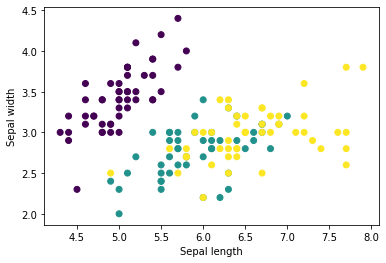

In [171]:
# convention is to rename pyplot to plt
import matplotlib.pyplot as plt

# magic command to display matplotlib plots inline
%matplotlib inline

# Plot
plt.scatter(
    iris_df["sepal_length"], # X axis is the sepal length
    iris_df["sepal_width"],  # Y axis is the sepal width
    c=iris_df["species"]     # Color is the species
)

# create labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# show
plt.show()

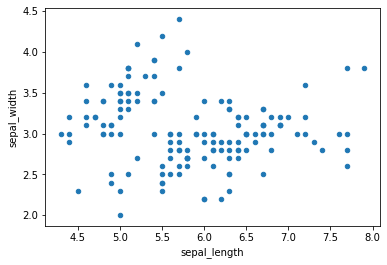

In [172]:
iris_df.plot.scatter(x="sepal_length",y="sepal_width")

##### magic command puts plot below line of code, no pop up

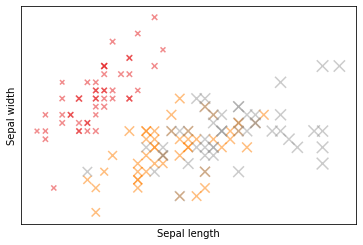

In [174]:
# Let's set some limits on the axes
plt.scatter(
    iris_df["sepal_length"], iris_df["sepal_width"],
    c=iris_df["species"],
     cmap=plt.cm.Set1, # Set2, etc
     alpha=0.5,
     s=iris_df["petal_length"] * 20,
     marker="x",
);

# name the labels, for clarity
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Remove ticks
plt.xticks(())
plt.yticks(())

plt.show()

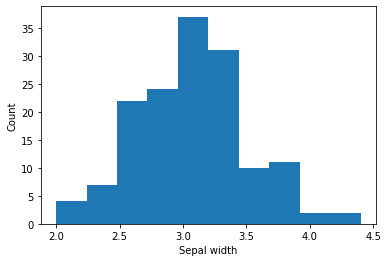

In [175]:
# Histograms:  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

plt.hist(iris_df["sepal_width"])
plt.xlabel('Sepal width')
plt.ylabel('Count')
plt.show()

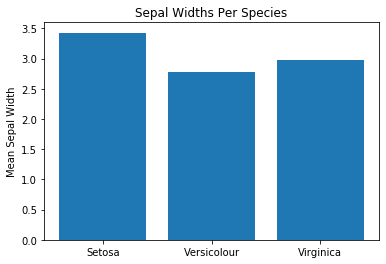

In [176]:
# Bar plots https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

species = ("Setosa", "Versicolour", "Virginica")
y_pos = np.arange(len(species))
mean_widths = tuple(np.mean(iris_df.loc[iris_df["species_name"] == x, "sepal_width"]) for x in species)
 
plt.bar(y_pos, mean_widths)
plt.xticks(y_pos, species)
plt.ylabel('Mean Sepal Width')
plt.title('Sepal Widths Per Species')
 
plt.show()

In [177]:
iris.sepal_width.plot.hist();
plt.xlabel('Sepal_width')
plt.ylabel('Sepal_length')


AttributeError: sepal_width

In [ ]:
plt.bar(y_pos, mean_widths, color="red" )#, color=("red", "yellow", "green"), edgecolor=("blue", "green", "black")) # bottom=0, align='edge', width=(.1, .2, .3) , alpha=0.5)
# barh / yticks
plt.xticks(y_pos, species)
plt.ylabel('Mean Sepal Width')
plt.title('Sepal Widths Per Species')
 
plt.show()

In [ ]:
# Box plots:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

data_to_plot = list(iris_df.loc[iris_df["species_name"] == x, "sepal_width"] for x in species)
plt.boxplot(data_to_plot)
plt.xticks((1, 2, 3), species)
plt.show()

In [ ]:
plt.boxplot(data_to_plot)#, notch=True, sym="x", vert=False, widths=.9, patch_artist=True, labels=species, showmeans=True)
# lie with medians, set outliers, etc
plt.show()

## Generic plot commands and subplots
* Doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html

### Figure
The canvas we are using.
### Subplot
Subsection of figure.
### Axes
Where we are plotting.

### plt.plot
Generic plot function that accepts x, y, and styling parameters.

In [ ]:
# evenly .2 intervals
t = np.arange(0., 5., 0.2)

# red dots
plt.plot(
    t, t, #linewidth=10, color="green",
)
plt.show()

In [ ]:
# evenly .2 intervals
t = np.arange(0., 5., 0.2)

# red dots
plt.plot(
    t, t, 'ro',
)
plt.show()

In [ ]:
# red dashes, blue squares and green triangles
plt.plot(
    t, t, 'r--',
)

plt.plot(
    t, t**2, 'bs',
)

plt.show()

In [ ]:
# subplots: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(2, 1, 1)

ax1.plot(
    t, t, 'r--',
)

ax2.plot(
    t, t**2, 'bs',
)

plt.show()

### Trend lines

In [ ]:
z = np.polyfit(iris_df["petal_length"], iris_df["petal_width"], 1)
p = np.poly1d(z)
print(z)
print(p)

In [ ]:
# PLT scatter plot (X, y, and color)
plt.scatter(iris_df["petal_length"], iris_df["petal_width"])
z = np.polyfit(iris_df["petal_length"], iris_df["petal_width"], 1)
p = np.poly1d(z)
plt.plot(iris_df["petal_length"], p(iris_df["petal_length"]),"r--")
# name the labels, for clarity
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [ ]:
# PLT scatter plot (X, y, and color)
plt.scatter(iris_df["petal_length"], iris_df["petal_width"])
z = np.polyfit(iris_df["petal_length"], iris_df["petal_width"], 1)
p = np.poly1d(z)
plt.plot(iris_df["petal_length"], p(iris_df["petal_length"]),"r--")
# name the labels, for clarity
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.savefig("x.png")

### Links
* https://matplotlib.org/index.html
* https://www.python-course.eu/matplotlib.php
* https://matplotlib.org/gallery.html

### Styles and other packages
* Matplotlib styles
* Pandas plotting based on matplotlib
* Seaborn
* Bokeh

### Pandas plotting based on matlab

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html



In [ ]:
plt.style.use("ggplot")
plt.figure()
ax = iris_df.plot(x="petal_length", y="petal_width", style="ro", legend=False)
ax.set_xlim(0.5, 8.0)
ax.set_ylim(0, 5.0)
plt.show()

In [ ]:
plt.style.use("classic")
plt.figure()
ax = iris_df.hist(column="sepal_length", color="red", alpha=0.5)
plt.title("Sepal Lengths")
plt.show()

### Seaborn
* https://seaborn.pydata.org/



In [ ]:
import seaborn as sns
sns.lmplot(x="petal_length", y="petal_width", data=iris_df) # , hue="species", fit_reg=False)


In [ ]:
# import seaborn as sns
sns.distplot(iris_df["sepal_length"])